
# **Acne Identifier**

## Background: 
#### Acne is a pervasive skin condition that affects millions of people worldwide, up to 30 percent of women still experience mild to moderate acne well into adulthood. However, finding effective acne products from the sea of options available can often feel like a daunting task. Many individuals refrain from seeking professional help due to the perceived high costs associated with dermatologist visits, which are typically reserved for severe cases. Existing generic solutions, such as benzoyl peroxide or acne patches, merely address symptoms without tackling the underlying problem. Consequently, a significant portion of the population remains underserved and lacks the necessary guidance to effectively manage their acne.

#### By harnessing the power of AI, we can gain a deeper understanding of our specific acne type, enabling us to make more accurate assessments about our skin. This, in turn, empowers us to make informed decisions regarding our skincare routine by targeting the root cause of our unique acne issue.

## Project Goal:

#### To build a convolution neural network to classify acne severity based on facial images

## Dataset:

#### acne images scrapped from **[Dermnetnz](https://dermnetnz.org/topics/acne-face-images)** **[Click here for code](https://github.com/KristinTsui/Acne-identifier/blob/main/Webscrapping_code_acne_data.ipynb)

## pre-processing

#### Subsetting: 33 images are selected based on image resolution
#### Annotation: each acne lesion was annotated using bounding box 
#### Labeling: Images are labelled based on a recognized scoring system in acne vulgaris: **[reference](https://ijdvl.com/scoring-systems-in-acne-vulgaris/#:~:text=They%20classified%20acne%20based%20on,the%20%5BTable%20%2D%204%5D)**

| Number of acne | Score       | Labeled as |
|----------------|-------------|------------|
|0-5             |mild         |1           |
|6-20            |moderate     |2           |
|21-50           |severe       |3           |
|50+             |very severe  |4           |   



### This is for the dataset with 33 annotated images

In [2]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize
import matplotlib.patches as patches
from tensorflow.keras import layers
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import image
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2
import os

In [3]:

os.chdir(r"C:\Users\Kristin\Desktop\Thinkful\Capstone4")

In [4]:
# path the dataset and annotation
acne_folder = r"C:\Users\Kristin\Desktop\Thinkful\Capstone4\Acne_data_33"
annotated_file = r"C:\Users\Kristin\Desktop\Thinkful\Capstone4\Annotation_33.ndjson"

In [5]:
import json
# 
annotations = []
# initialize lists to store image path and corresponding labels
with open(annotated_file, "r") as f:
    for line in f:
        annotation = json.loads(line)
        annotations.append(annotation)

In [6]:
# make a list of acne severity and a list for image path
acne_score =[]
image_paths = []

for annotation in annotations:
    image_file = annotation['data_row']['external_id']
    acne_count = len(annotation['projects']['cljymaou702cy07x50qtqdxzw']['labels'][0]['annotations']['objects'])
    # construct image path
    image_path = os.path.join(acne_folder, image_file)
    image_paths.append(image_path)
    
    if acne_count <= 5:
        severity = 1 #mild
    elif 6 <= acne_count <=20:
        severity = 2 # moderate
    elif 21 <= acne_count <= 50:
        severity = 3 # severe
    else:
        severity = 4
    acne_score.append(severity)

In [7]:
# create a dictionary with image_path as keys and a list of bounding boxes as values
image_bbox_map = {}
image_paths = []


# Iterate through the annotation data and extract the information
for annotation in annotations:
    image_file = annotation['data_row']['external_id']
    acne_annotations = annotation['projects']['cljymaou702cy07x50qtqdxzw']['labels'][0]['annotations']['objects']
    
    # Construct image path
    image_path = os.path.join(acne_folder, image_file)
    image_paths.append(image_path)

    # initialize an empty list to hold bounding boxes for the current image
    bounding_boxes = []
    
    # Extract bounding box coordinates and class labels
    for acne_annotation in acne_annotations:
        bounding_box = acne_annotation['bounding_box']

        
     
        bounding_boxes.append(bounding_box)
        
    image_bbox_map[image_path] = bounding_boxes

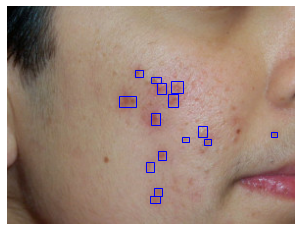

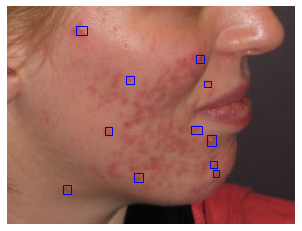

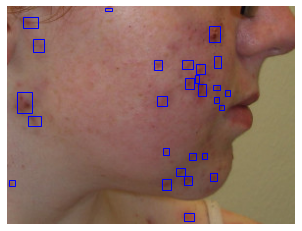

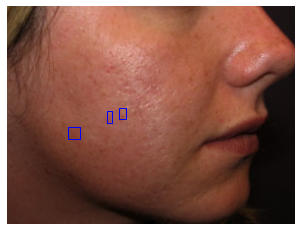

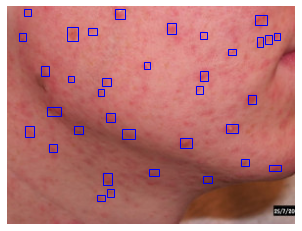

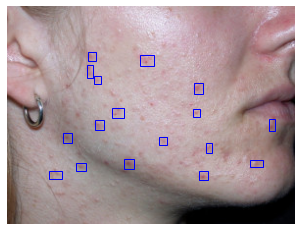

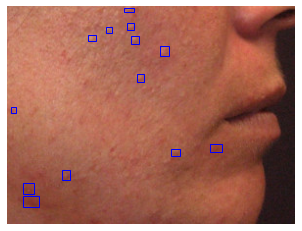

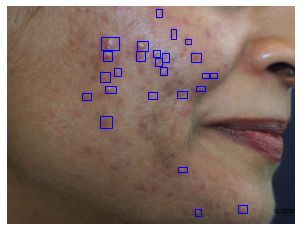

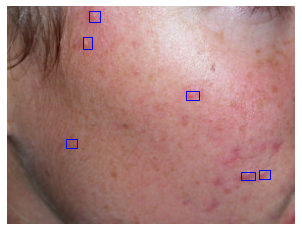

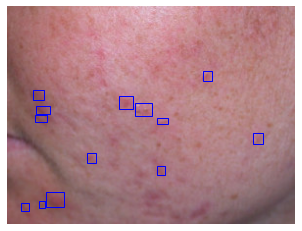

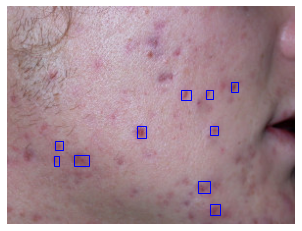

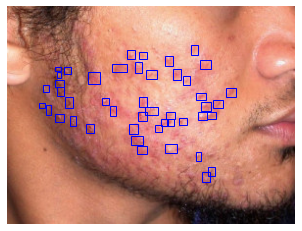

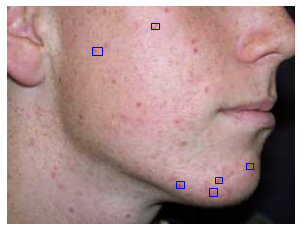

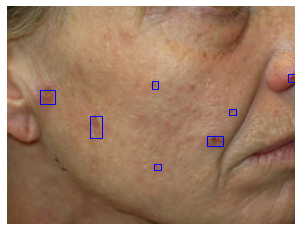

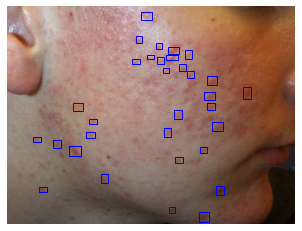

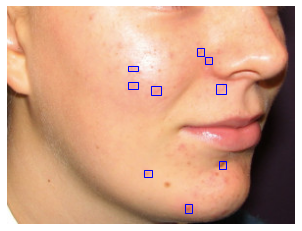

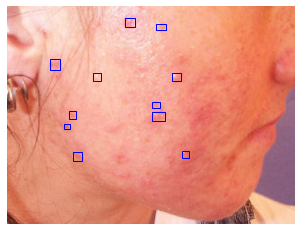

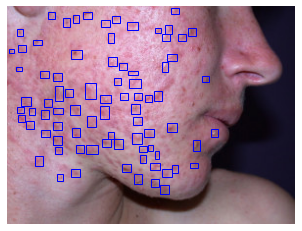

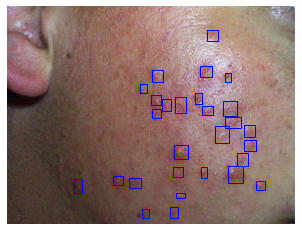

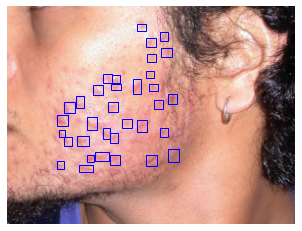

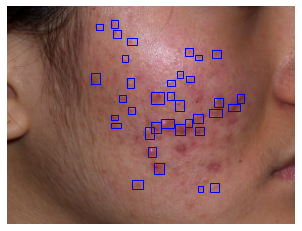

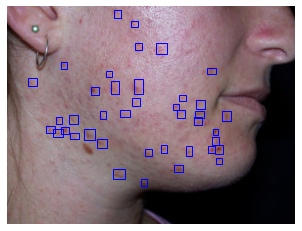

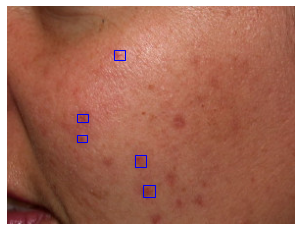

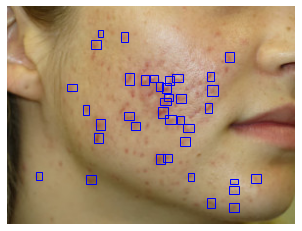

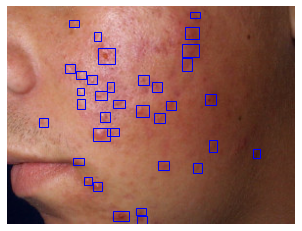

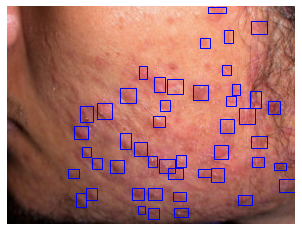

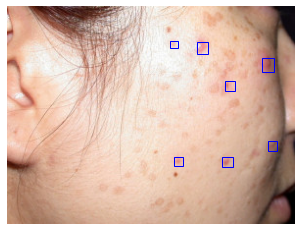

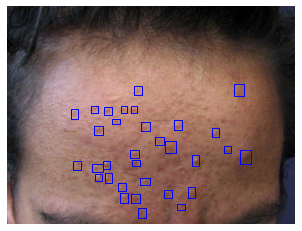

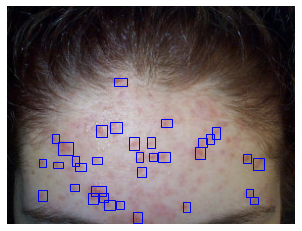

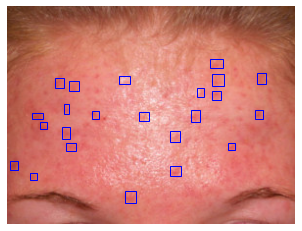

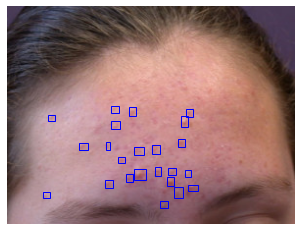

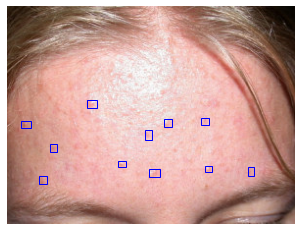

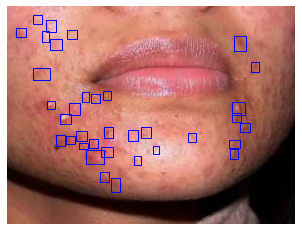

In [8]:
cwd = os.getcwd()
output_folder = 'annotated_images_33'
os.makedirs(output_folder, exist_ok=True)
annotated_img_paths = []
for image_path, bbox_list in image_bbox_map.items():
    img = cv2.imread(image_path)
    
    # plot the image
    fig, ax = plt.subplots(1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    for coordinates in bbox_list:
        t, l, h, w = coordinates['top'], coordinates['left'], coordinates['height'], coordinates['width']
        rect = patches.Rectangle(
            (l, t), w, h, linewidth=1, edgecolor='b', facecolor='none'
        )
        ax.add_patch(rect)
    
    # save the images with the added annotations in the new folder
    image_name = os.path.basename(image_path)
    image_name_wo_extension = os.path.splitext(image_name)[0]
    output_path = os.path.join(output_folder, f"{image_name_wo_extension}_annotated.png")
    plt.savefig(output_path)
    ann_img_path = os.path.join(cwd, output_path)

    annotated_img_paths.append(ann_img_path)
    
    # Show the plot
    plt.show()

In [13]:
# load all annotated images in the directory
loaded_annotated_images = list()
for path in annotated_img_paths:
  # load image as numpy array
  img_data = image.imread(path).astype(np.float32)
  # resize image to 200 x 200
  resized_img = resize(img_data, (200,200))
  # store loaded image
  loaded_annotated_images.append(resized_img)
  print('> loaded %s %s' % (path, resized_img.shape))

> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\annotated_images_33\acne-face-1-10__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd_annotated.png (200, 200, 4)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\annotated_images_33\acne-face-1-50__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd_annotated.png (200, 200, 4)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\annotated_images_33\acne-face-1-51__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd_annotated.png (200, 200, 4)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\annotated_images_33\acne-face-1-53__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd_annotated.png (200, 200, 4)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\annotated_images_33\acne-face-3-2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDE4XQ_annotated.png (200, 200, 4)
> loaded C:\Users\Kristin\Desktop\Thinkful\Capstone4\annotated_images_33\acne-face-3-3__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd_annotate

In [14]:
# Create a dictionary with annotated image path, scores and pixel data
import pandas as pd
data = {
    'Image_Path': annotated_img_paths,
    'Image_Pixels': loaded_annotated_images,
    'Acne_Scores': acne_score
}

# create a dataframe from the dictionary
df = pd.DataFrame(data)

In [15]:
df['Image_Pixels'][1]

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.

(array([ 2.,  0.,  0., 13.,  0.,  0., 17.,  0.,  0.,  1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

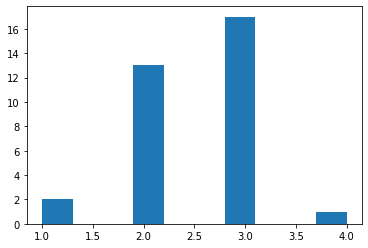

In [16]:
plt.hist(df['Acne_Scores'])

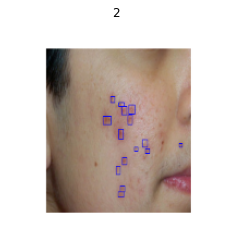

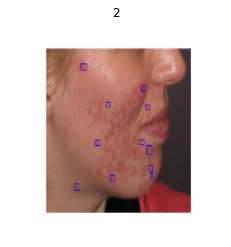

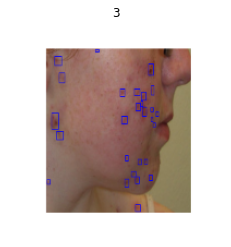

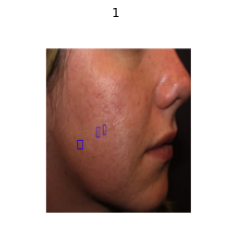

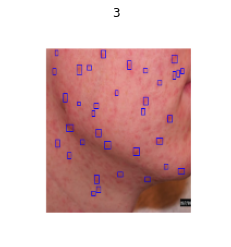

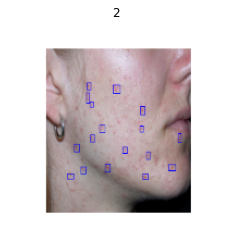

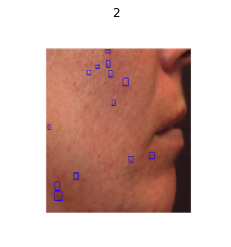

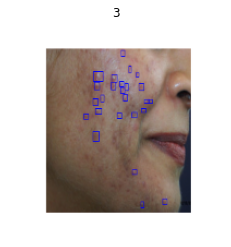

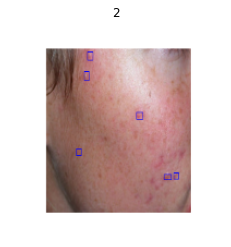

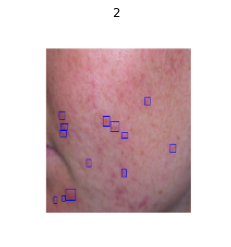

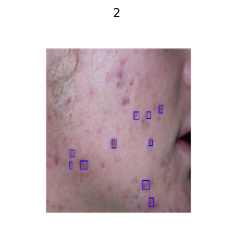

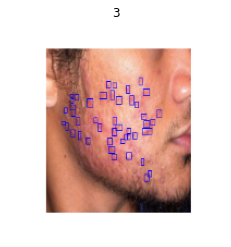

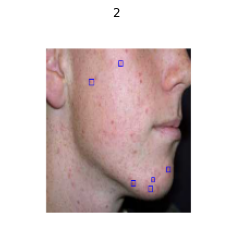

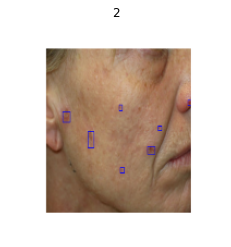

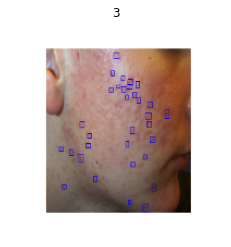

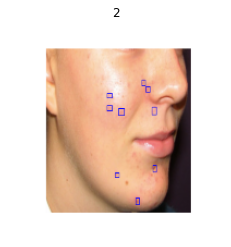

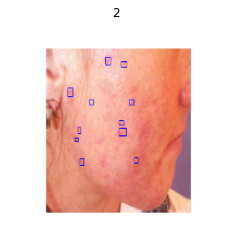

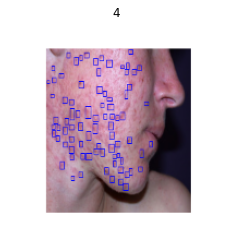

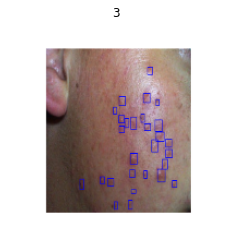

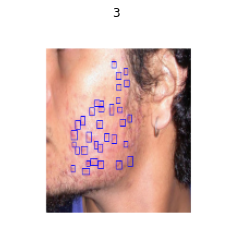

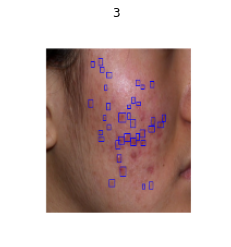

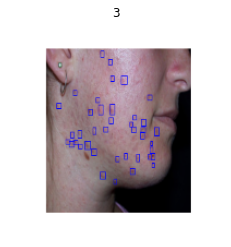

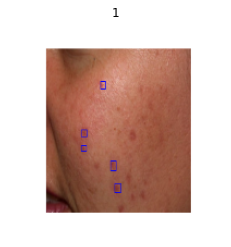

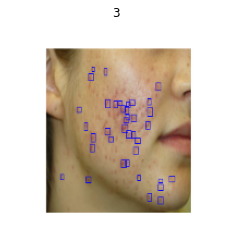

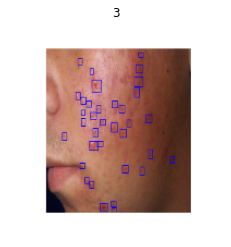

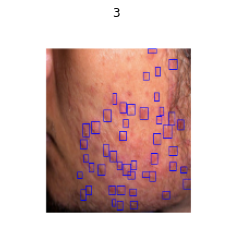

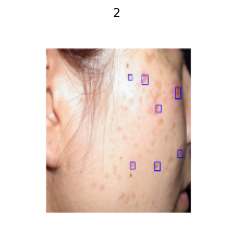

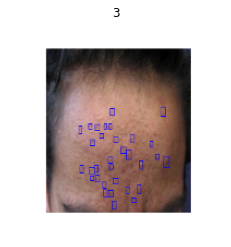

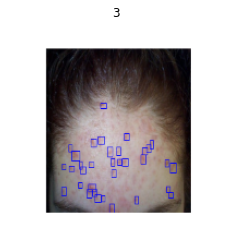

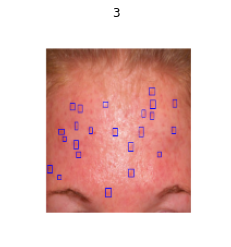

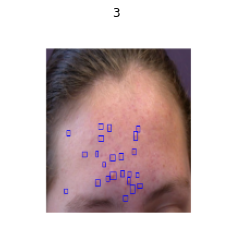

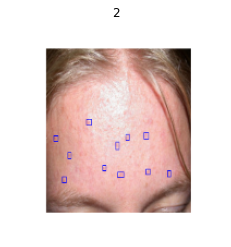

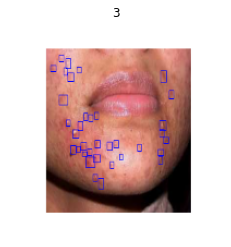

In [17]:
for _,row in df.iterrows():
    pixel_data = row['Image_Pixels']
    # display the image using pixel data
    plt.imshow(pixel_data)
    plt.axis('off')
    plt.title(row['Acne_Scores'])
    plt.show()

In [18]:
# use one hot encoding for the image categories (mild, moderate, severe, very severe)
number_of_classes = 4
from tensorflow.keras.utils import to_categorical
Y = to_categorical(df['Acne_Scores']-1, number_of_classes)

In [19]:
X = np.array(df['Image_Pixels'].tolist())
X = X.reshape(-1,200,200,4)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [20]:
ann= Sequential()
ann.add(Flatten(input_shape=(X_train.shape[1:]))),
ann.add(Dense(32, activation='ReLU'))
ann.add(Dense(16, activation='ReLU'))
ann.add(Dense(4, activation='softmax'))

In [21]:
ann.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 438ms/step - loss: 2.0338 - accuracy: 0.0435
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 7.7638 - accuracy: 0.4783
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 85.8998 - accuracy: 0.0870
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 10.8130 - accuracy: 0.0435
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 9.8963 - accuracy: 0.4783


In [23]:
cnn= Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D(pool_size = (2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(4, activation='softmax')

]

)

In [24]:
opt_1 = Adam(learning_rate=0.001)
cnn.compile(optimizer=opt_1, loss='categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
epochs = 10
history = cnn.fit(X_train, Y_train, batch_size = 2, epochs=epochs, validation_split=0.3)

Epoch 1/10
8/8 [==============================] - 10s 1s/step - loss: 20.4062 - accuracy: 0.5000 - val_loss: 24.8307 - val_accuracy: 0.1429
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 2.5117 - accuracy: 0.6250 - val_loss: 1.6843 - val_accuracy: 0.4286
Epoch 3/10
8/8 [==============================] - 8s 998ms/step - loss: 0.8967 - accuracy: 0.4375 - val_loss: 1.8628 - val_accuracy: 0.2857
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.6022 - accuracy: 0.6875 - val_loss: 6.7433 - val_accuracy: 0.2857
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.8487 - accuracy: 0.6250 - val_loss: 7.4124 - val_accuracy: 0.4286
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.4778 - accuracy: 0.6875 - val_loss: 3.5103 - val_accuracy: 0.2857
Epoch 7/10
8/8 [==============================] - 8s 1s/step - loss: 0.2977 - accuracy: 0.8750 - val_loss: 6.1164 - val_accuracy: 0.4286
Epoch 8/10
8/8 [===================

In [26]:
# Evaluate the cnn model using test data

score = cnn.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.5317769050598145
Test accuracy: 0.6000000238418579


Text(0.5, 1.0, 'Training and Validation Loss')

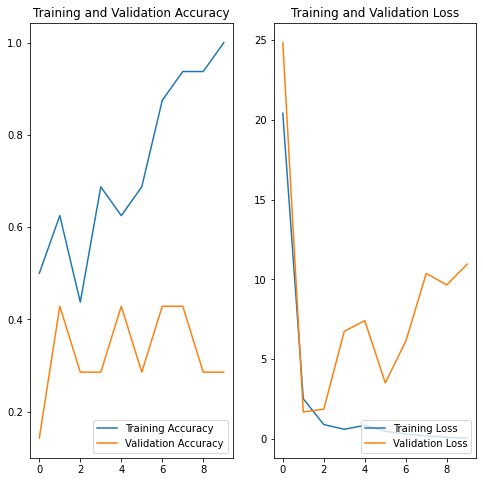

In [27]:
# visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

High accuracy on training set, although validation loss is increasing --> model might be overfitting?